### Set up Workspace

In [2]:
import sys
dir_analysis = '/home/jovyan/local-climate-data-tool/Analysis/Phase1_ProcessData'
sys.path.insert(0, dir_analysis)

import pickle
import matplotlib.pyplot as plt
import numpy as np
import zarr
import xarray as xr

import analysis_parameters

In [4]:
# Change this directory to be wherever you put the dummy data

data_path=analysis_parameters.DIR_DUMMY_DATA
this_experiment_id = ['historical','ssp126', 'ssp370','ssp245','ssp585']
experiment_keys = this_experiment_id.copy()
experiment_keys.append('historical_obs')

### Option 1: Read In Data from Pickle

In [3]:
#dict_timeSeries = dict()
#for experiment_id in this_experiment_id:
#    filename=data_path+'dummyData_modelData_'+experiment_id+'.pickle'
#    with open(filename, 'rb') as f:
#        ds=pickle.load(f)
#    dict_timeSeries[experiment_id]=ds
    
#filename=data_path+'dummyData_observationData'+'.pickle'
#with open(filename, 'rb') as f:
#        ds=pickle.load(f)
#dict_timeSeries['historical_obs']=ds

### Option 2: Read in Data from zarr

In [9]:
dict_timeSeries = dict()

# Read in model data
for experiment_id in this_experiment_id:
    filename=data_path+'Zarr/dummyData_modelData_'+experiment_id+'.zarr'
    ds = xr.open_zarr(filename)
    dict_timeSeries[experiment_id]=ds

# Read in observation data
filename=data_path+'Zarr/dummyData_observationData'+'.zarr'
ds = xr.open_zarr(filename)
dict_timeSeries['historical_obs']=ds

### Make Figures

In [10]:
################## FIGURE SETTINGS YOU CAN ADJUST ################

# For Seattle: 47.6062, 237.67
# For Chicago: 41.8781, 272.3702
thislat = 47.6062
thislon = 237.67
colors=['black','blue','green','orange','red','gray']

Text(0, 0.5, 'Temperature')

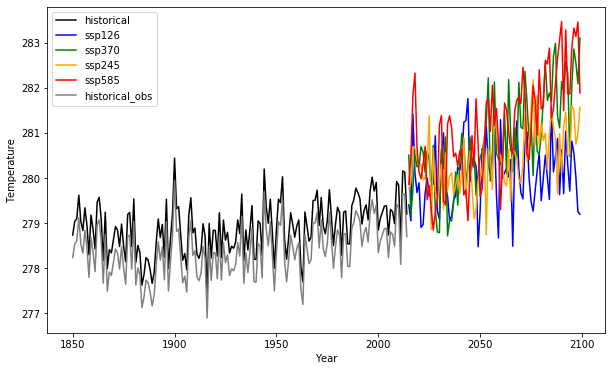

In [7]:
################## MAKE FIGURE ###########################
        
fig = plt.figure(figsize=(10,6))
for i in range(0,len(experiment_keys)):
    # Define experiment id
    experiment_id = experiment_keys[i]
    
    # Read in data for experiment id
    ds = dict_timeSeries[experiment_id]
    
    # Select that one location
    ds=ds.sel(lon=thislon, lat=thislat, method='nearest')
    ds_annual = ds.groupby('time.year').mean('time')
    
    # Plot each model
    plt.plot(ds_annual['year'].values,ds_annual['mean'].values,label = experiment_id, color=colors[i])

plt.legend()
plt.xlabel('Year')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

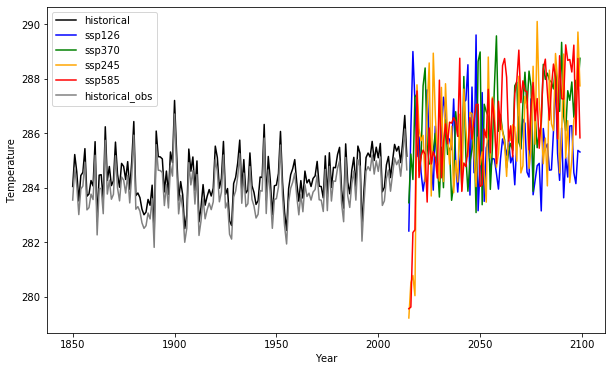

In [8]:
################## MAKE FIGURE ###########################
        
fig = plt.figure(figsize=(10,6))
for i in range(0,len(experiment_keys)):
    # Define experiment id
    experiment_id = experiment_keys[i]
    
    # Read in data for experiment id
    ds = dict_timeSeries[experiment_id]
    
    # Select that one location
    ds=ds.sel(lon=thislon, lat=thislat, method='nearest')
    ds = ds.sel(time=ds['time.month']==6)
    ds_annual = ds.groupby('time.year').mean('time')
    
    # Plot each model
    plt.plot(ds_annual['year'].values,ds_annual['mean'].values,label=experiment_id,color=colors[i])

plt.legend()
plt.xlabel('Year')
plt.ylabel('Temperature')